# Добин Илья. Вариант 27

В этом файле исключительно код + объяснение вспомогательных операций для получение результатов.

In [426]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skew, kurtosis

In [427]:
df_hw = pd.read_csv("Homework_2_data.csv", sep=";")
year = 2023
industry = ''
region = "Оренбургская область, Орск"
if industry == '':
    df = (df_hw[(df_hw.year == year) 
                     & (df_hw.region == region)])
elif region == '':
    df = (df_hw[(df_hw.year == year) 
                     & (df_hw. industry == industry )])
df

,region,educ,age,female,industry,work_hours,wage,foreign_language,internet,alcohol,is_children,health,weight,height,smoke,year
143,"Оренбургская область, Орск",0,"40,5",0,"ТРАНСПОРТ, СВЯЗЬ",12,45000,0,1,1,1,0,80,180,1,2023
515,"Оренбургская область, Орск",1,55,1,ОБРАЗОВАНИЕ,5,15000,1,1,1,1,0,87,166,0,2023
631,"Оренбургская область, Орск",2,46,1,ОБРАЗОВАНИЕ,8,32000,1,1,1,1,1,59,156,0,2023
632,"Оренбургская область, Орск",0,47,0,"ТРАНСПОРТ, СВЯЗЬ",12,50000,1,1,1,1,0,115,186,0,2023
633,"Оренбургская область, Орск",1,"54,5",1,ВОЕННО-ПРОМЫШЛЕННЫЙ КОМПЛЕКС,8,38700,0,1,0,1,1,60,152,0,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4512,"Оренбургская область, Орск",2,43,1,ОРГАНЫ УПРАВЛЕНИЯ,8,40000,1,1,1,1,0,69,158,0,2023
4513,"Оренбургская область, Орск",2,37,0,"ТРАНСПОРТ, СВЯЗЬ",12,40000,1,1,1,1,0,94,170,0,2023
4514,"Оренбургская область, Орск",2,37,1,"ТОРГОВЛЯ, БЫТОВОЕ ОБСЛУЖИВАНИЕ",10,30000,1,1,1,1,0,62,158,0,2023
4515,"Оренбургская область, Орск",1,44,0,"ТОРГОВЛЯ, БЫТОВОЕ ОБСЛУЖИВАНИЕ",8,50000,1,1,1,1,0,89,183,0,2023


In [428]:
df.dtypes

region              object
educ                 int64
age                 object
female               int64
industry            object
work_hours           int64
wage                object
foreign_language     int64
internet             int64
alcohol              int64
is_children          int64
health               int64
weight              object
height              object
smoke                int64
year                 int64
dtype: object

Видим, что многие численные признаки имеют строковый тип, выведем все их уникальные значения, чтобы посмотреть, сможем ли мы корректно скастить значения к int64.

In [429]:
df["height"].unique()

array(['180', '166', '156', '186', '152', '165', '179', '160', '173',
       '170', '164', '158', '182', '175', '168', '193', '163', '157',
       '162', '171', '167', '172', '178', '176', '169', '181', '155',
       '174', '187', '190', '161', '159', '183'], dtype=object)

In [430]:
df["weight"].unique()

array(['80', '87', '59', '115', '60', '89', '100', '78', '58', '72', '96',
       '75', '73', '68', '57', '81', '84', '92', '66', '110', '62', '86',
       '67', '90', '76', '70', '63', '64', '52', '65', '55', '105', '74',
       '56', '95', '85', '82', '106', '61', '91', '94', '69'],
      dtype=object)

In [431]:
df["wage"].unique()

array(['45000', '15000', '32000', '50000', '38700', '36800', '35000',
       '25000', '40000', '60000', '18000', '30000', '20000', '46000',
       '22000', '36000', '23000', '28000', '24900', '42000', '41000',
       '26000', '48000', '120000', '60700', '34000', '24000', '38000',
       '21000', '16000', '55000', '160000', '37000', '200000', '31000',
       '17000', '28600', '14000', '43000', '65000'], dtype=object)

In [432]:
df["age"].unique()

array(['40,5', '55', '46', '47', '54,5', '57', '59', '58', '60,5', '49',
       '63,5', '56,5', '39,5', '48,5', '53,5', '36', '58,5', '48', '51,5',
       '38', '65,5', '37', '50,5', '51', '54', '34', '41,5', '40', '44',
       '44,5', '32,5', '47,5', '41', '42', '45', '38,5', '62,5', '42,5',
       '37,5', '43,5', '59,5', '43', '35,5', '33,5', '34,5', '57,5', '31',
       '46,5', '26,5', '53', '49,5', '61', '56', '45,5'], dtype=object)

* `height`, `weight`, `wage` - целые числа, проблем с кастом нет.
* `age` - десятичные дроби, записанные через запятую, нужно сначала заменить ее на точку и кастить к float64

In [433]:
df=df.copy() #че-то пандас ругался без этого, решил добавить
df['age'] = df['age'].str.replace(',', '.')
df['age'] = pd.to_numeric(df['age'])
df['height'] = pd.to_numeric(df['height'])
df['weight'] = pd.to_numeric(df['weight'])
df['wage'] = pd.to_numeric(df['wage'])

In [434]:
df.dtypes

region               object
educ                  int64
age                 float64
female                int64
industry             object
work_hours            int64
wage                  int64
foreign_language      int64
internet              int64
alcohol               int64
is_children           int64
health                int64
weight                int64
height                int64
smoke                 int64
year                  int64
dtype: object

## 1. Описание выборки

## 2. Статистики

In [435]:
numeric = ["age", "height", "weight", "wage","work_hours"]
categorical = ["educ", "female", "foreign_language", "internet", "alcohol", "is_children", "health", "smoke"]

In [436]:
def highlight_rows(s):
    if s.name in numeric:
        return ['background-color: #EEFFC6']*len(s)
    else:
        return ['']*len(s)

In [437]:
df_for_eda = df.drop(columns=['industry','year','region'])

In [438]:
stats_df = df_for_eda.describe().T
stats_df["полный размах"] = stats_df["max"] - stats_df["min"]

In [439]:
df_task2 = stats_df[["min","max","mean","std","полный размах"]]
df_task2.style.apply(highlight_rows, axis=1).format(lambda x: f'{x:.2f}')

,min,max,mean,std,полный размах
educ,0.00,2.00,1.24,0.83,2.00
age,26.50,65.50,46.12,8.92,39.00
female,0.00,1.00,0.59,0.49,1.00
work_hours,4.00,12.00,8.17,1.62,8.00
wage,14000.00,200000.00,36475.65,24160.82,186000.00
foreign_language,0.00,1.00,0.39,0.49,1.00
internet,0.00,1.00,0.96,0.20,1.00
alcohol,0.00,1.00,0.55,0.50,1.00
is_children,1.00,1.00,1.00,0.00,0.00
health,0.00,1.00,0.31,0.47,1.00


## 3. Квартили

In [440]:
stats_df["межквартильный размах"] = stats_df["75%"] - stats_df["25%"]
df_task3 = stats_df[["25%", "50%", "75%", "межквартильный размах"]].loc[numeric]
df_task3.style.format(lambda x: f'{x:.2f}')

,25%,50%,75%,межквартильный размах
age,39.75,44.50,53.25,13.50
height,163.00,168.00,175.00,12.00
weight,64.00,72.00,85.50,21.50
wage,25000.00,32000.00,42000.00,17000.00
work_hours,8.00,8.00,8.00,0.00


## 4. Средние

In [441]:
stats_df["median"] = df_for_eda.median()
stats_df["mode"] = df_for_eda.mode().iloc[0]
stats_df[["min","mean","median","mode","max"]].loc[numeric]

,min,mean,median,mode,max
age,26.5,46.117391,44.5,34.0,65.5
height,152.0,169.052174,168.0,170.0,193.0
weight,52.0,75.034783,72.0,68.0,115.0
wage,14000.0,36475.652174,32000.0,50000.0,200000.0
work_hours,4.0,8.165217,8.0,8.0,12.0


## 5. Ящики с усами)

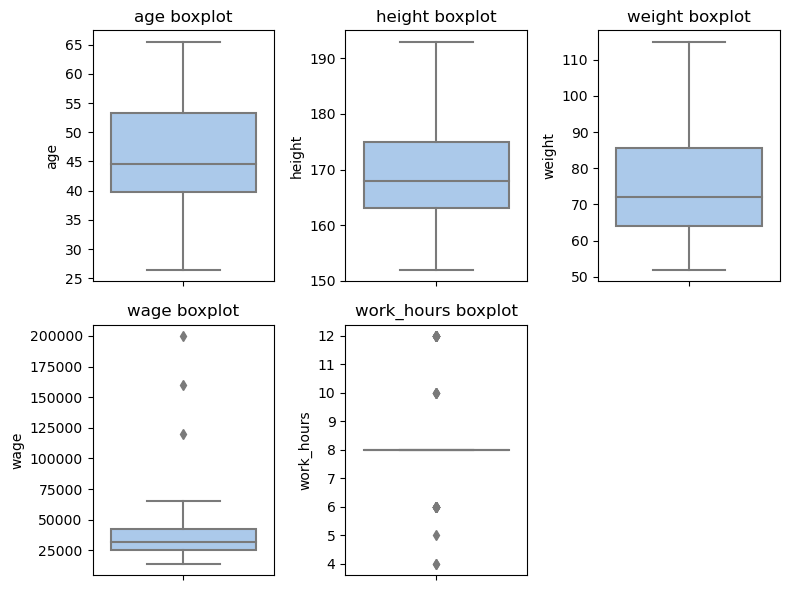

In [442]:
fig, axes = plt.subplots(2, 3, figsize=(8, 6))
for i in range(len(numeric)):
    ax = axes[i//3, i%3]
    feature = numeric[i]
    sns.boxplot(
        y=feature, data=df, ax=ax, palette="pastel",
    )
    ax.set_title(f'{feature} boxplot')
    
ax = axes[1,2]
ax.axis('off')

plt.tight_layout()

## 6. Гистограммы

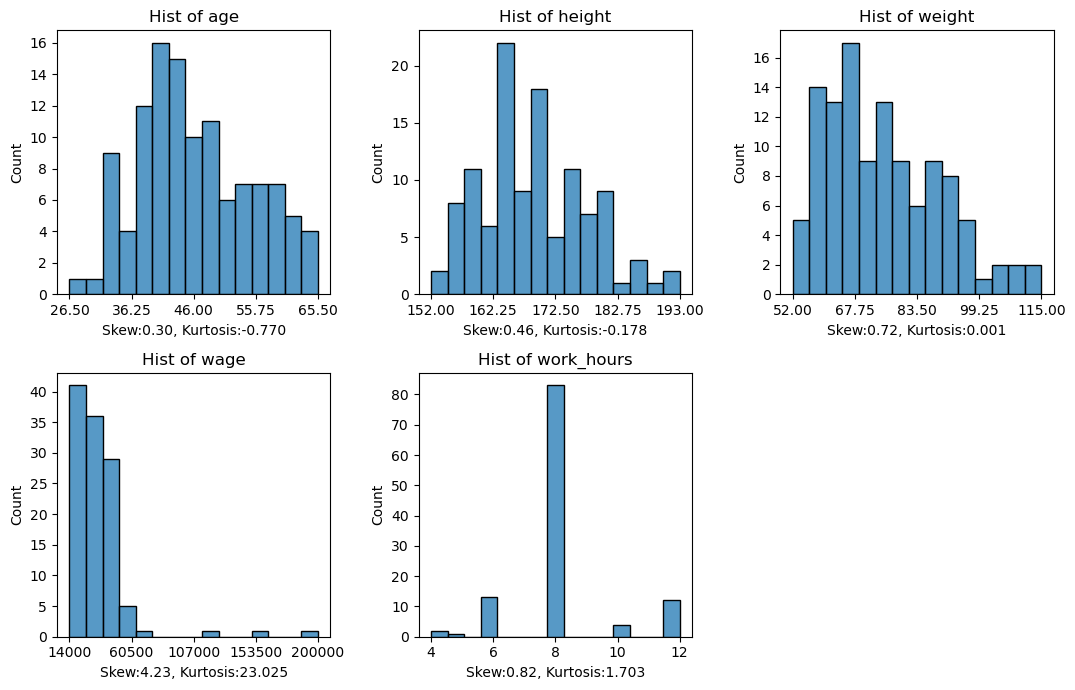

In [443]:
fig, axes = plt.subplots(2, 3, figsize=(11, 7))
for i in range(len(numeric)):
    ax = axes[i//3, i%3]
    feature = numeric[i]
    xticks = np.linspace(df[feature].min(), df[feature].max(), 5)
    sns.histplot(
        data=df[feature], bins=15, ax=ax,
    )
    ax.set_title(f'Hist of {feature}')
    ax.set_xticks(xticks)
    ax.set_xlabel(f'Skew:{skew(df[feature]):.2f}, Kurtosis:{kurtosis(df[feature]):.3f}')
    
    
ax = axes[1,2]
ax.axis('off')

plt.tight_layout()

## 7. Образование

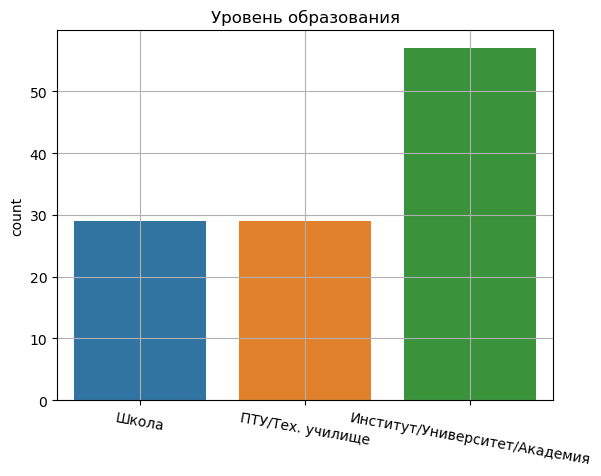

In [444]:
sns.countplot(x="educ", data=df)
plt.title("Уровень образования")
plt.xticks(np.arange(3),
           labels=["Школа", "ПТУ/Тех. училище", "Институт/Университет/Академия"],
          rotation=-10)
plt.xlabel("")
plt.grid()
plt.show()

## 8. Корреляции

In [445]:
corr = df_for_eda.corr()

In [446]:
corr

,educ,age,female,work_hours,wage,foreign_language,internet,alcohol,is_children,health,weight,height,smoke
educ,1.000000,-0.219281,0.243943,-0.186398,0.064596,0.473324,0.216719,0.034970,NaN,-0.220674,-0.005142,-0.069485,-0.434350
age,-0.219281,1.000000,-0.080652,0.046718,-0.053922,-0.267465,-0.266121,-0.005698,NaN,0.171647,0.160216,-0.139596,0.143837
female,0.243943,-0.080652,1.000000,-0.376276,-0.278502,0.050427,-0.003771,-0.257745,NaN,0.179776,-0.650124,-0.671186,-0.443607
work_hours,-0.186398,0.046718,-0.376276,1.000000,0.140463,-0.026955,0.074877,0.201827,NaN,-0.185814,0.236210,0.139728,0.133421
wage,0.064596,-0.053922,-0.278502,0.140463,1.000000,0.186351,0.130068,0.149278,NaN,-0.191387,0.354019,0.254967,0.046152
foreign_language,0.473324,-0.267465,0.050427,-0.026955,0.186351,1.000000,0.170941,0.298844,NaN,-0.349137,0.127162,0.096298,-0.324069
internet,0.216719,-0.266121,-0.003771,0.074877,0.130068,0.170941,1.000000,0.063324,NaN,-0.223878,0.102527,0.078641,-0.205293
alcohol,0.034970,-0.005698,-0.257745,0.201827,0.149278,0.298844,0.063324,1.000000,NaN,-0.177895,0.141133,0.120309,0.079631
is_children,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
health,-0.220674,0.171647,0.179776,-0.185814,-0.191387,-0.349137,-0.223878,-0.177895,NaN,1.000000,-0.115116,-0.120968,0.114756


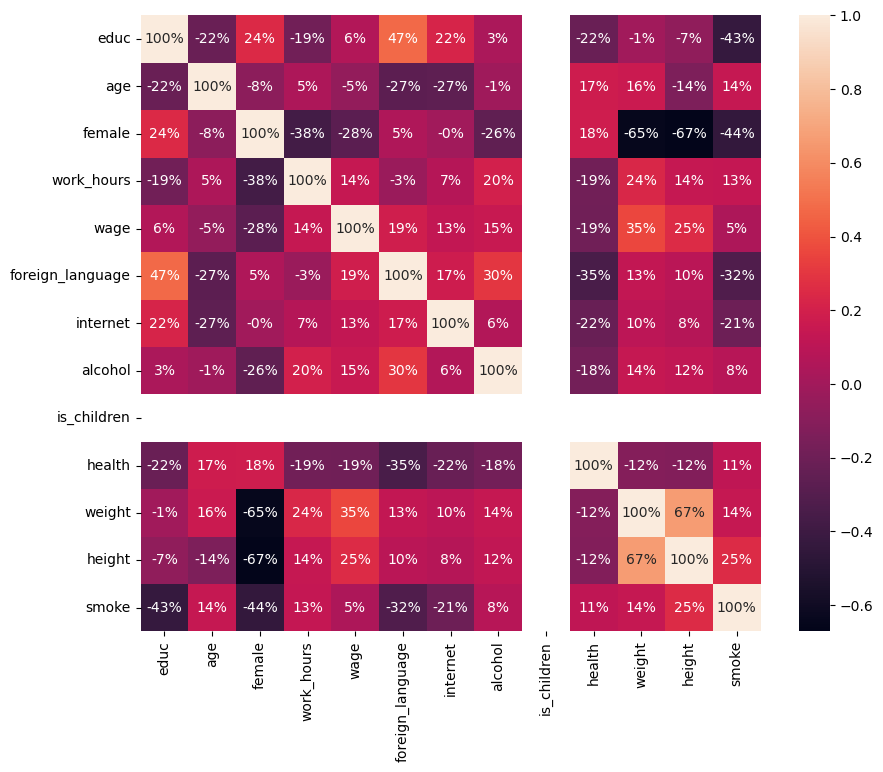

<Figure size 640x480 with 0 Axes>

In [447]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.0%')
plt.show()
plt.savefig("images/8.png")

In [448]:
!cd images

## 9. Зарплата

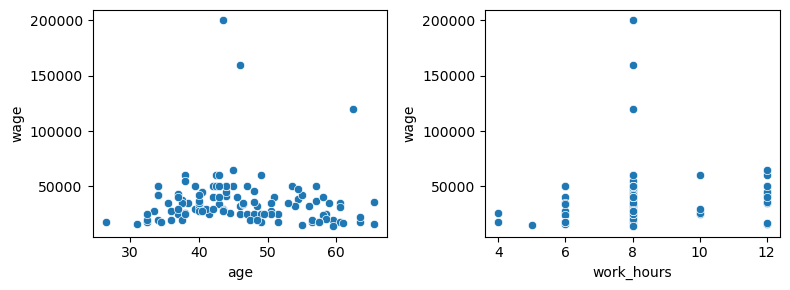

In [449]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
features = ["age", "work_hours"]
for i in range(2):
    ax = axes[i]
    feature = features[i]
    sns.scatterplot(data=df_for_eda, x=feature, y="wage", ax = ax)
plt.tight_layout()

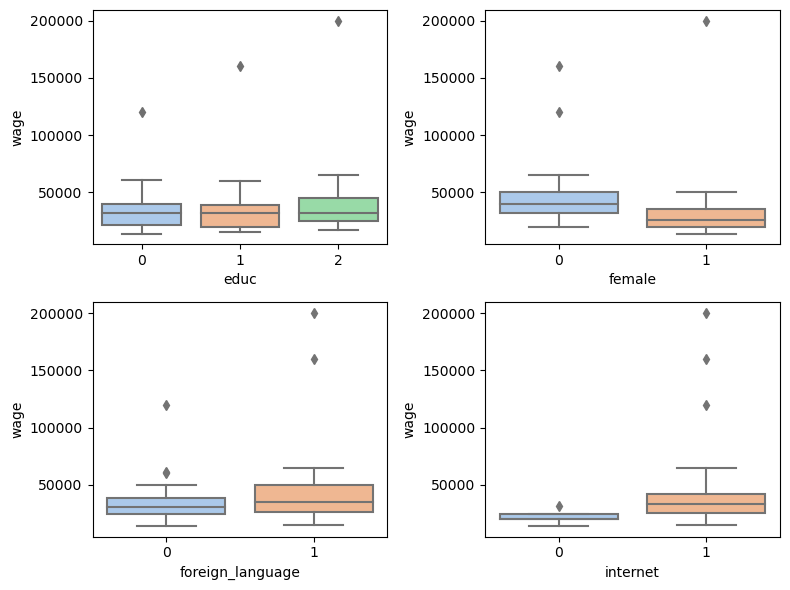

In [450]:
fig, axes = plt.subplots(2, 2, figsize=(8, 6))
features = ["educ", "female", "foreign_language", "internet"]
for i in range(len(features)):
    ax = axes[i//2, i%2]
    feature = features[i]
    sns.boxplot(
            x=feature, y="wage", data=df_for_eda, ax=ax, palette="pastel",
        )
plt.tight_layout()

## 10. Модель

In [451]:
from sklearn.linear_model import LinearRegression
df['high'] = np.where(df['educ'] ==2, 1, 0)
y = df['wage']
X = df[['age','high','female','is_children','smoke']]
model = LinearRegression()
model.fit(X,y)
print(f'Константа {model.intercept_},\nВеса {model.coef_}')

Константа 50352.38940708004,
Веса [  -129.85412264   4920.63027699 -16222.72398987      0.
  -3519.75570232]


## 11. Тест

In [472]:
import statsmodels.api as sm
from scipy.stats import jarque_bera
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     2.998
Date:                Sun, 24 Nov 2024   Prob (F-statistic):             0.0216
Time:                        23:30:02   Log-Likelihood:                -1317.4
No. Observations:                 115   AIC:                             2645.
Df Residuals:                     110   BIC:                             2658.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
age          -129.8541    253.078     -0.513      

## 12. Гипотеза. 1 Коэффициент

## 13. Гипотеза. Несколько коэффициентов

## 14. Остатки-прогнозы

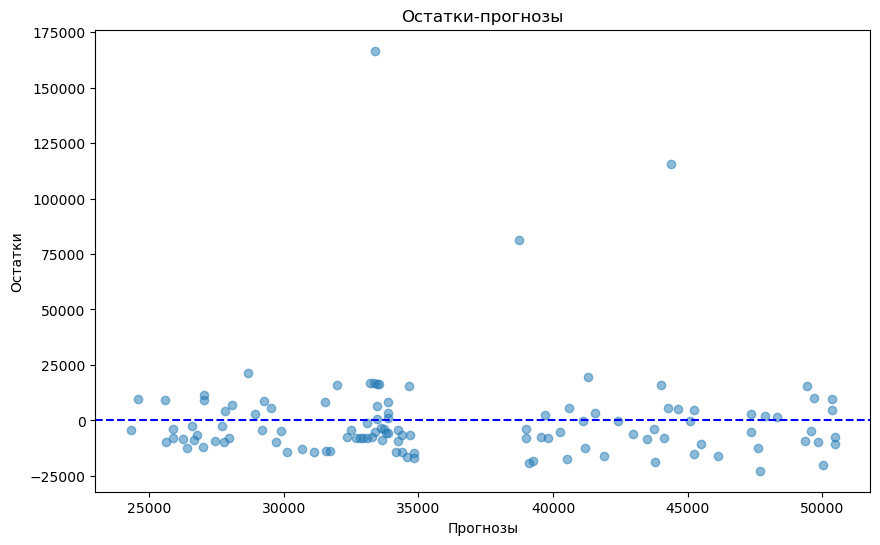

In [455]:
import matplotlib.pyplot as plt

fitted_values = model.fittedvalues
residuals = model.resid

plt.figure(figsize=(10, 6))
plt.scatter(fitted_values, residuals, alpha=0.5)
plt.xlabel("Прогнозы")
plt.ylabel("Остатки")
plt.title("Остатки-прогнозы")
plt.axhline(y=0, color='b', linestyle='--')
plt.show()


## 15. Новая модель. Сравнение

In [458]:
X_new = df[['age', 'high', 'female']]
X_new = sm.add_constant(X_new)  

new_model = sm.OLS(y, X_new).fit()

summary = new_model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     3.914
Date:                Sun, 24 Nov 2024   Prob (F-statistic):             0.0106
Time:                        23:03:03   Log-Likelihood:                -1317.5
No. Observations:                 115   AIC:                             2643.
Df Residuals:                     111   BIC:                             2654.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   1.28e+04      3.841      0.0

## 16. Выбросы

## 17. Прогноз зп.

Добавлю 94-летнего парня, и спрогнозирую, сколько он сможет зарабатывать в Оренгбургкской области

In [471]:
man94 = pd.DataFrame({
    'const': [1],
    'age': [94],
    'educ': [2],
    'female': [0] 
})

predicted_wage = new_model.predict(man94)
dov_interval = new_model.get_prediction(man94).conf_int()

print("зарплата:", predicted_wage[0], "\nдоверительный интервал:", dov_interval)

зарплата: 47181.70835169294 
доверительный интервал: [[15996.16093788 78367.25576551]]
